<a href="https://colab.research.google.com/github/caltunay/drivendata_competition-heart_disease_recognition/blob/master/94%25%20Accuracy%20-%20RFC%20-%20Heart_Disease_Prediction_Take_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
x_train = pd.read_csv('train_values.csv')
y_train = pd.read_csv('train_labels.csv')

x_test = pd.read_csv('test_values.csv')

print(x_train.shape, y_train.shape, x_t)

(180, 14) (180, 2) (90, 14)


In [0]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [0]:
x_train.nunique().sort_values()

fasting_blood_sugar_gt_120_mg_per_dl      2
sex                                       2
exercise_induced_angina                   2
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_ekg_results                       3
chest_pain_type                           4
num_major_vessels                         4
oldpeak_eq_st_depression                 34
resting_blood_pressure                   36
age                                      40
max_heart_rate_achieved                  73
serum_cholesterol_mg_per_dl             118
patient_id                              180
dtype: int64

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

* slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart **(categorical ?** )
* thal (type: **categorical**): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
* resting_blood_pressure (type: int): resting blood pressure 
* chest_pain_type (type: int): chest pain type (4 values) (**categorical** ? )
* num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy (**categorical** ? )
* fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl (**categorical** ? )
* resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)   (**categorical** ? )
* serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl 
* oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* sex (type: binary): 0: female, 1: male (**categorical** ? )
* age (type: int): age in years 
* max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
* exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True) (**categorical** ? )


In [0]:
# Categorical values are all integers. Will get them dummied as is 

category_cols = 'slope_of_peak_exercise_st_segment thal chest_pain_type num_major_vessels fasting_blood_sugar_gt_120_mg_per_dl resting_ekg_results exercise_induced_angina'.split()

x_train_dummied = pd.get_dummies(data = x_train, drop_first = True, columns = category_cols, prefix_sep = '|')
x_train_dummied.shape

(180, 21)

In [0]:
x_train_dummied.head()


,patient_id,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment|2,slope_of_peak_exercise_st_segment|3,thal|normal,thal|reversible_defect,chest_pain_type|2,chest_pain_type|3,chest_pain_type|4,num_major_vessels|1,num_major_vessels|2,num_major_vessels|3,fasting_blood_sugar_gt_120_mg_per_dl|1,resting_ekg_results|1,resting_ekg_results|2,exercise_induced_angina|1
0,0z64un,128,308,0.0,1,45,170,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,ryoo3j,110,214,1.6,0,54,158,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,yt1s1x,125,304,0.0,1,77,162,0,0,1,0,0,0,1,0,0,1,0,0,1,1
3,l2xjde,152,223,0.0,1,40,181,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,oyt4ek,178,270,4.2,1,59,145,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
x_test_dummied = pd.get_dummies(data = x_test, drop_first = True, columns = category_cols, prefix_sep = '|')
x_test_dummied.head(1)

,patient_id,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment|2,slope_of_peak_exercise_st_segment|3,thal|normal,thal|reversible_defect,chest_pain_type|2,chest_pain_type|3,chest_pain_type|4,num_major_vessels|1,num_major_vessels|2,num_major_vessels|3,fasting_blood_sugar_gt_120_mg_per_dl|1,resting_ekg_results|1,resting_ekg_results|2,exercise_induced_angina|1
0,olalu7,170,288,0.2,1,59,159,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
x_test_dummied = x_test_dummied.drop(labels = 'patient_id', axis = 1)


In [0]:
x_train_dummied = x_train_dummied.drop(labels = 'patient_id', axis = 1)

x_train_dummied.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment|2,slope_of_peak_exercise_st_segment|3,thal|normal,thal|reversible_defect,chest_pain_type|2,chest_pain_type|3,chest_pain_type|4,num_major_vessels|1,num_major_vessels|2,num_major_vessels|3,fasting_blood_sugar_gt_120_mg_per_dl|1,resting_ekg_results|1,resting_ekg_results|2,exercise_induced_angina|1
0,128,308,0.0,1,45,170,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,110,214,1.6,0,54,158,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,125,304,0.0,1,77,162,0,0,1,0,0,0,1,0,0,1,0,0,1,1
3,152,223,0.0,1,40,181,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,178,270,4.2,1,59,145,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x_train_dummied)

In [0]:
scaled_x_test_dummied = scaler.transform(x_test_dummied)
scaled_x_test_dummied

array([[ 2.28076406,  0.73783356, -0.72435404, ..., -0.07474351,
         0.95650071, -0.68074565],
       [ 0.39431935, -1.25945294,  0.34876306, ..., -0.07474351,
        -1.04547753, -0.68074565],
       [-0.66680581, -1.3735836 ,  1.33245373, ..., -0.07474351,
         0.95650071,  1.46897745],
       ...,
       [ 0.98383332, -0.09912459, -0.18779549, ..., -0.07474351,
         0.95650071, -0.68074565],
       [ 0.39431935, -0.11814637, -0.90320689, ..., -0.07474351,
         0.95650071,  1.46897745],
       [ 1.10173612, -0.04205926,  0.43818948, ..., -0.07474351,
        -1.04547753, -0.68074565]])

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
cols = x_train_dummied.columns.tolist()
len(cols)

20

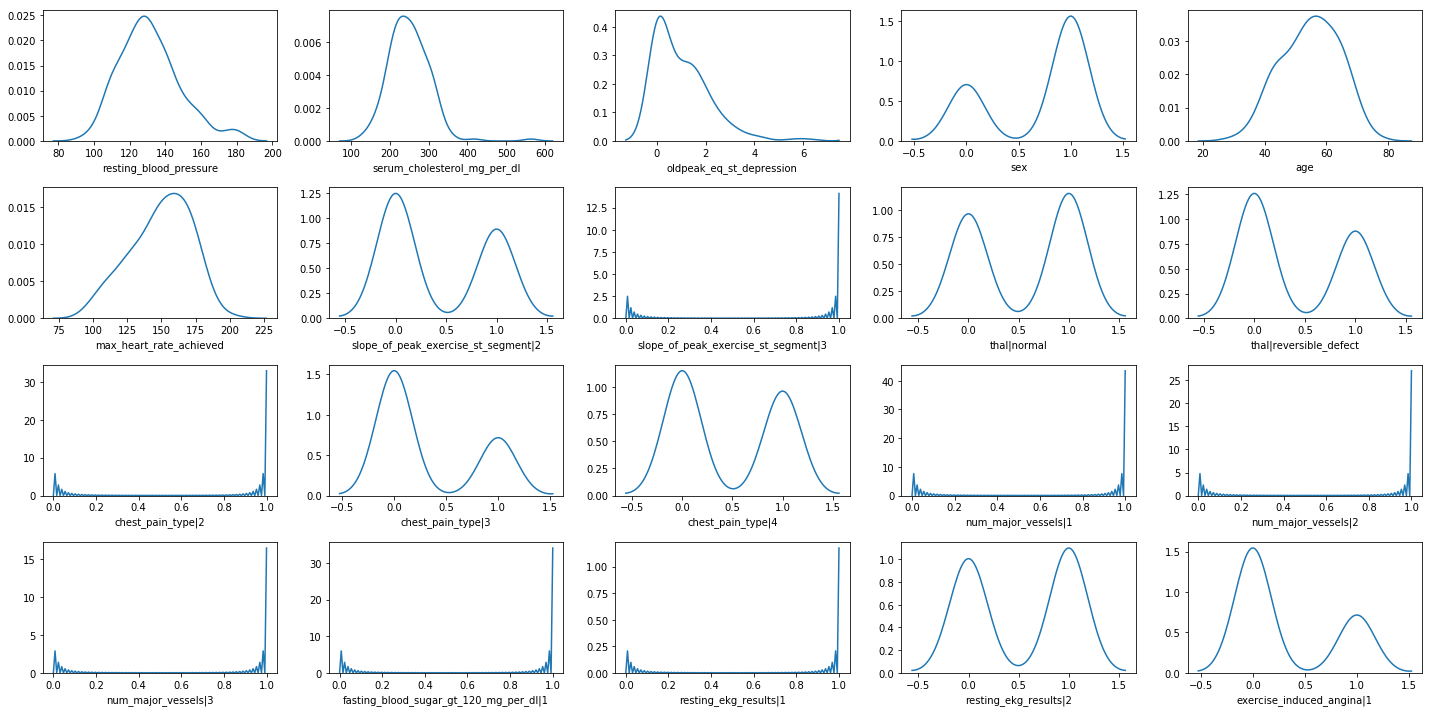

In [0]:
n = 1
plt.figure(figsize = (20,10))

for i in cols:
    plt.subplot(4,5,n)
    sns.distplot(x_train_dummied[i], hist = False)
    n += 1
    
plt.tight_layout()
plt.show()

In [0]:
GridSearchCV()

LogisticRegression()
RandomForestClassifier()
DecisionTreeClassifier()
SVC()
KNeighborsClassifier()

for i in models:
    
    gs = GridSearchCV()
    gs.best_estimator_.fit(x_train,y_train)

In [0]:
train_labels = y_train.heart_disease_present.values

In [0]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(-4, 4, 50)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


gs_log = GridSearchCV(LogisticRegression(random_state = 42), param_grid = hyperparameters, cv = 10, verbose = 0)
gs_log.fit(scaled_x,train_labels)

In [0]:
log_best = gs_log.best_estimator_

In [0]:
from sklearn.metrics import log_loss

In [0]:
pred_proba = log_best.predict_proba(scaled_x)

In [0]:
log_loss(train_labels, pred_proba)

0.3255313251504666

In [0]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

In [0]:
log_pred = log_best.predict(scaled_x)

In [0]:
accuracy_score(train_labels, log_pred)

0.8833333333333333

In [0]:
print(classification_report(train_labels, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       100
           1       0.93      0.80      0.86        80

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



In [0]:
parameters_rfc = { 
    'n_estimators': list(range(5,20)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(2,8)),
    'criterion' :['gini', 'entropy']
}

gs_rfc = GridSearchCV(RandomForestClassifier(random_state = 42), cv = 10, verbose = 0, param_grid = parameters_rfc)
gs_rfc.fit(scaled_x, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [0]:
rfc_best = gs_rfc.best_estimator_

In [0]:
rfc_proba = rfc_best.predict_proba(scaled_x)

In [0]:
rfc_proba

array([[0.86451895, 0.13548105],
       [0.95328989, 0.04671011],
       [0.37290521, 0.62709479],
       [0.3635294 , 0.6364706 ],
       [0.68340578, 0.31659422],
       [0.87824919, 0.12175081],
       [0.04881313, 0.95118687],
       [0.14029395, 0.85970605],
       [0.17422138, 0.82577862],
       [0.92774641, 0.07225359],
       [0.59690254, 0.40309746],
       [0.76502826, 0.23497174],
       [0.72012986, 0.27987014],
       [0.81373566, 0.18626434],
       [0.27933396, 0.72066604],
       [0.09795261, 0.90204739],
       [0.86772308, 0.13227692],
       [0.07689225, 0.92310775],
       [0.92528284, 0.07471716],
       [0.64733205, 0.35266795],
       [0.91881764, 0.08118236],
       [0.68020608, 0.31979392],
       [0.94046056, 0.05953944],
       [0.57739335, 0.42260665],
       [0.92117484, 0.07882516],
       [0.86301246, 0.13698754],
       [0.7495651 , 0.2504349 ],
       [0.95771748, 0.04228252],
       [0.47027245, 0.52972755],
       [0.77070782, 0.22929218],
       [0.

In [0]:
log_loss(train_labels, rfc_proba)

0.26373534224078576

In [0]:
rfc_pred = rfc_best.predict(scaled_x)

In [0]:
print(classification_report(train_labels, rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       100
           1       0.96      0.89      0.92        80

    accuracy                           0.93       180
   macro avg       0.94      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180



In [0]:
depths = np.arange(1, 21)
num_leafs = np.arange(1,20)


dtc_parameters = {
    'max_depth':depths,
    'min_samples_leaf':num_leafs}

gs_dtc = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = dtc_parameters, verbose = 0, cv = 10, n_jobs = -1)
gs_dtc.fit(scaled_x, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
     

In [0]:
dtc_best = gs_dtc.best_estimator_

In [0]:
dtc_proba = dtc_best.predict_proba(scaled_x)

In [0]:
log_loss(train_labels ,dtc_proba)

0.2935173132065225

In [0]:
dtc_pred = dtc_best.predict(scaled_x)

In [0]:
print(accuracy_score(train_labels, dtc_pred))

0.8777777777777778


In [0]:
print(classification_report(train_labels, dtc_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       100
           1       0.97      0.75      0.85        80

    accuracy                           0.88       180
   macro avg       0.90      0.86      0.87       180
weighted avg       0.89      0.88      0.88       180



In [0]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
svc_parameters = {'C': Cs, 'gamma' : gammas}

gs_svc = GridSearchCV(SVC(random_state = 42), cv = 10, verbose = 0, param_grid = svc_parameters)
gs_svc.fit(scaled_x, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
svc_best = gs_svc.best_estimator_

In [0]:
svc_pred = svc_best.predict(scaled_x)

In [0]:
print(accuracy_score(train_labels, svc_pred))

0.8444444444444444


In [0]:
print(classification_report(train_labels, svc_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       100
           1       0.87      0.76      0.81        80

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.85      0.84      0.84       180



In [0]:
knc_parameters = {
    'n_neighbors':np.arange(5,20),
    'leaf_size':np.arange(1,10),
    'weights':'uniform distance'.split(),
    'algorithm':'auto ball_tree kd_tree brute'.split()
}


gs_knc = GridSearchCV(KNeighborsClassifier(),verbose = 0, n_jobs = -1, cv = 10, param_grid = knc_parameters)

gs_knc.fit(scaled_x, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
knc_best = gs_knc.best_estimator_

In [0]:
knc_proba = knc_best.predict_proba(scaled_x)

In [0]:
log_loss(train_labels, knc_proba)

9.992007221626413e-16

In [0]:
knc_pred = knc_best.predict(scaled_x)

In [0]:
print(classification_report(train_labels, knc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        80

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [0]:
knc_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0])

In [0]:
# KNeighbors Classifier predicts 100% 

test_label_pred = knc_best.predict(scaled_x_test_dummied)
pred_df = pd.DataFrame(test_label_pred)

In [0]:
pred_df.head(10)

,0
0,1
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,0
9,0


In [0]:
test_patient_id = x_test[['patient_id']]

In [0]:
test_patient_id.head(10)

,patient_id
0,olalu7
1,z9n6mx
2,5k4413
3,mrg7q5
4,uki4do
5,kev1sk
6,9n6let
7,jxmtyg
8,51s2ff
9,wi9mcs


In [0]:
preds = pd.merge(left = test_patient_id, right = pred_df, left_index = True, right_index = True)

In [0]:
preds.to_csv('Predictions.csv')

In [0]:
pred_df = pd.DataFrame(rfc_proba)
pred_df.head()

,0,1
0,0.864519,0.135481
1,0.953290,0.046710
2,0.372905,0.627095
3,0.363529,0.636471
4,0.683406,0.316594


In [0]:
# preds.head()
preds.drop(labels = 0, axis = 1, inplace = True)

In [0]:
preds.rename({1:'heart_disease_present'}, axis = 1, inplace = True)

In [0]:
preds.head()

,patient_id,heart_disease_present
0,olalu7,0.135481
1,z9n6mx,0.046710
2,5k4413,0.627095
3,mrg7q5,0.636471
4,uki4do,0.316594


In [0]:
preds2 = preds.copy()
preds2.set_index('patient_id', inplace = True)

In [0]:
preds2.to_csv('Predictions2.csv')

In [0]:
x_test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1
